<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span><ul class="toc-item"><li><span><a href="#Создайте-DataFrame-в-котором-будут-даты-публикации-вакансий,-названия,-описания,-только-добавьте-поле-ключевые-навыки" data-toc-modified-id="Создайте-DataFrame-в-котором-будут-даты-публикации-вакансий,-названия,-описания,-только-добавьте-поле-ключевые-навыки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Создайте DataFrame в котором будут даты публикации вакансий, названия, описания, только добавьте поле ключевые навыки</a></span><ul class="toc-item"><li><span><a href="#Вытаскиваем-вакансии-в-defaultdict" data-toc-modified-id="Вытаскиваем-вакансии-в-defaultdict-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Вытаскиваем вакансии в defaultdict</a></span></li><li><span><a href="#Преобразуем-defaultdict-в-DateFrame" data-toc-modified-id="Преобразуем-defaultdict-в-DateFrame-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Преобразуем defaultdict в DateFrame</a></span></li></ul></li><li><span><a href="#Переведите-даты-публикаций-в-формат-datetime-и-постройте-график-опубликованных-вакансий-по-датам" data-toc-modified-id="Переведите-даты-публикаций-в-формат-datetime-и-постройте-график-опубликованных-вакансий-по-датам-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам</a></span></li><li><span><a href="#Переведите-даты-в-дни-недели,-и-определите-день-недели,-в-который-больше-всего-публикуют-вакансий" data-toc-modified-id="Переведите-даты-в-дни-недели,-и-определите-день-недели,-в-который-больше-всего-публикуют-вакансий-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий</a></span></li><li><span><a href="#Определите-по-полю-с-ключевыми-навыками,-какие-навыки-больше-всего-востребованы-для-найденных-вакансий" data-toc-modified-id="Определите-по-полю-с-ключевыми-навыками,-какие-навыки-больше-всего-востребованы-для-найденных-вакансий-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий</a></span></li><li><span><a href="#Постройте-график-наиболее-востребованных-навыков" data-toc-modified-id="Постройте-график-наиболее-востребованных-навыков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Постройте график наиболее востребованных навыков</a></span></li></ul></li></ul></div>

# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [77]:
import requests
from tqdm.auto import tqdm
import time

In [79]:
sber = '3529'
page = 0
num_per_page = 100
moscow = 1
# url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [80]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages
print('found: '+str(vacancies.get('found'))
      +'\n pages: '+str(vacancies.get('pages'))
      +'\n per_page: '+str(vacancies.get('per_page'))
      +'\n page: '+str(vacancies.get('page'))
      +'\n clusters: '+str(vacancies.get('clusters'))
      +'\n arguments: '+str(vacancies.get('arguments'))
      +'\n alternate_url: '+str(vacancies.get('alternate_url'))
     )
# vacancies

found: 6325
 pages: 20
 per_page: 100
 page: 0
 clusters: None
 arguments: None
 alternate_url: https://hh.ru/search/vacancy?employer_id=3529&enable_snippets=true&items_on_page=100


In [38]:
from collections  import Counter, defaultdict

In [12]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [13]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [48]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [81]:
len(all_vacancy_ids)

2000

In [296]:
vac_id = 43326021
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()
res

<Response [403]>

In [297]:
vacancy

{'errors': [{'value': 'captcha_required',
   'captcha_url': 'https://hh.ru/account/captcha?state=pxvcxBozfu7ry7R4QCetFpeicJ2Ml-ur_701s7jX2mZxCzHziryEFFjVgnI-vznkPrNJrXPDrB6LqaxdbqnkHNISlPMm6Y4nr5jLldkDqfR5cAiQlwQvTFe3CDGgNF8a',
   'type': 'captcha_required'}],
 'request_id': '167942399795389aa2bf5e82fc13daee'}

## Создайте DataFrame в котором будут даты публикации вакансий, названия, описания, только добавьте поле ключевые навыки

### Вытаскиваем вакансии в defaultdict

In [93]:
tab_dict = defaultdict(list)
for i in tqdm(range(len(all_vacancy_ids))) :
    vacancy = requests.get(f'https://api.hh.ru/vacancies/{all_vacancy_ids[i]}').json()
    tab_dict['id'].append(vacancy['id'])
    tab_dict['name'].append(vacancy['name'])
    tab_dict['published_at'].append(vacancy['published_at'])
    tab_dict['description'].append(vacancy['description'])
    tab_dict['key_skills'].append(vacancy['key_skills'])
    if i>0 and i % 100 == 0 :
        # на каждом 100 запросе ждем что-бы не появлялась капча  
        time.sleep(60) 

  0%|          | 0/2000 [00:00<?, ?it/s]

In [92]:
# переход к капче
import webbrowser
webbrowser.open_new_tab('https://hh.ru/account/captcha?state=pxvcxBozfu7ry7R4QCetFpeicJ2Ml-ur_701s7jX2mZxCzHziryEFFjVgnI-vznkPrNJrXPDrB6LqaxdbqnkHAu8bTzXjzb1GU18cfaWlHTz-DjqVXcqWuZWQsEoCtkT'
                       +'&backurl=http://hh.ru')

True

In [95]:
import pandas as pd
import numpy as np

### Преобразуем defaultdict в DateFrame

In [96]:
df = pd.DataFrame.from_dict(tab_dict)

## Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам

<AxesSubplot:xlabel='published date'>

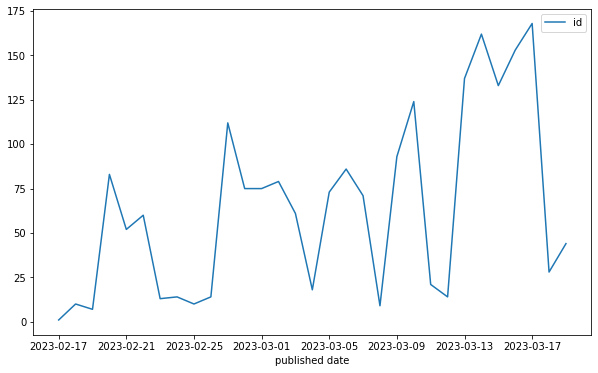

In [257]:
import datetime as dt
# import matplotlib.pyplot as plt
df['published date'] =df.published_at.apply(lambda x:dt.datetime.strptime(x[:10], '%Y-%m-%d').date())
df_daily=df[['published date','id']].groupby('published date')['id'].nunique().reset_index()
df_daily.plot(kind='line',x='published date', y='id', sharex = 'True',sharey= 'True',figsize=(10, 6))

<AxesSubplot:xlabel='published date'>

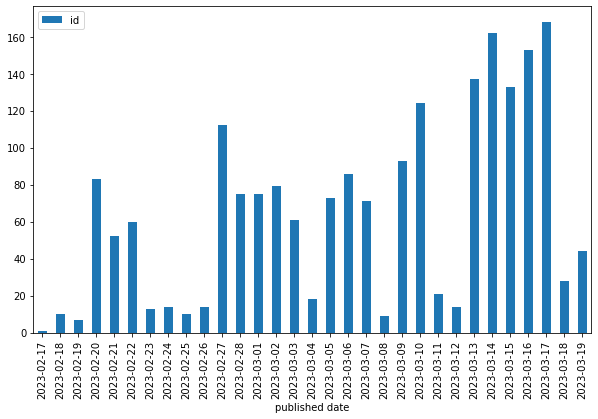

In [259]:
df_daily.plot(kind='bar',x='published date', y='id', sharex = 'True',sharey= 'True',figsize=(10, 6))

## Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

Больше всего публикаций(418) в Monday


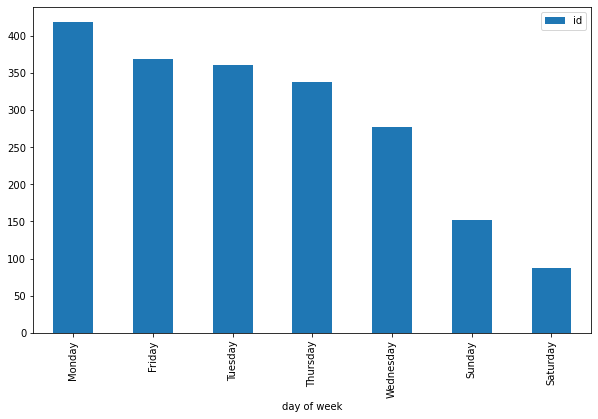

In [289]:
df['day of week'] =df.published_at.apply(
    lambda x:dt.datetime.strptime(x[:10], '%Y-%m-%d').date().strftime('%A'))
df_day_of_week=df[['day of week','id']].groupby('day of week')['id'].nunique().reset_index()
df_day_of_week_s=df_day_of_week.sort_values(by=['id'],ascending=False).copy().reset_index()
df_day_of_week_s.plot(
    kind='bar', x='day of week', y='id', sharex='True',
    sharey='True',figsize=(10, 6))
print('Больше всего публикаций('
      + str(df_day_of_week_s['id'][0])+') в ' 
      + df_day_of_week_s['day of week'][0]
      )

In [166]:
df['python in name'] = df.name.apply(
    lambda x:x.lower().find('python')>=0 if 1 else 0)
df['python in description'] = df.description.apply(
    lambda x:x.lower().find('python')>=0 if 1 else 0)
df[df['python in name']|df['python in description']].id.nunique() 

139

## Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий

In [204]:
lst = []
for cell in df['key_skills']:
    for j in cell:
        lst.append(j['name'])
cnt = Counter(lst)
# dict(cnt)
cnt.most_common(10)

[('Работа в команде', 59),
 ('SQL', 58),
 ('Деловое общение', 52),
 ('Активные продажи', 47),
 ('Грамотная речь', 43),
 ('Деловая переписка', 39),
 ('Ведение переговоров', 39),
 ('Деловая коммуникация', 37),
 ('Linux', 36),
 ('Развитие продаж', 35)]

## Постройте график наиболее востребованных навыков

<AxesSubplot:>

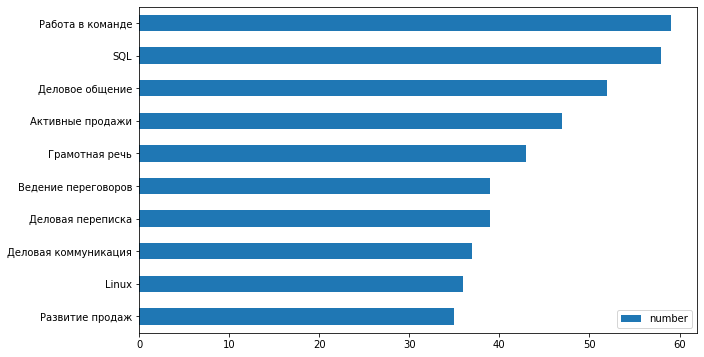

In [295]:
skills_df = pd.DataFrame.from_dict(
    dict(cnt.most_common(10)), orient='index', columns = ['number'] )
skills_df.sort_values(by='number', ascending=True).plot(
    kind='barh',sharey= 'True',figsize=(10, 6))